# Visualisation des données Covid

Dans ce notebook, on se propose de visualiser les données de Covid-19 pour différents pays.

Chargement des modules Python nécessaires :

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

Le jeu de données utilisé est fourni par [Our World in Data](https://ourworldindata.org/). C'est un jeu de données de référence mis à jour quotidiennement.

Téléchargement du jeu de données au format CSV, directement depuis le [site GitHub](https://github.com/owid/covid-19-data/tree/master/public/data) du projet.

In [8]:
covid_data = pd.read_csv("https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=true",
                         parse_dates=["date"])

Aperçu du jeu de données :

In [9]:
covid_data.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [10]:
covid_data.shape

(133596, 67)

Ce jeu de données contient 67 colonnes et plus de 133 000 lignes. Une ligne correspond à une date et un pays.

Liste de tous les pays (ou groupes de pays) représentés :

In [11]:
covid_data["location"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

Les 67 colonnes sont les suivantes :

In [12]:
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [13]:
covid_data["iso_code"].unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB',
       'GUY', 'HTI', 'OWID_HIC', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'OWID_INT', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN',
       'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'OWID_

## Visualisation des cas pour quelques pays

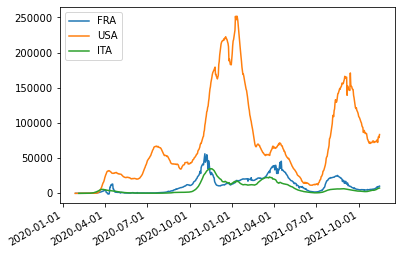

In [14]:
countries = ["FRA", "USA", "ITA"]
for country in countries:
    plt.plot(covid_data.loc[ covid_data["iso_code"] == country, "date" ], 
             covid_data.loc[ covid_data["iso_code"] == country, "new_cases_smoothed" ],
             label=country)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")

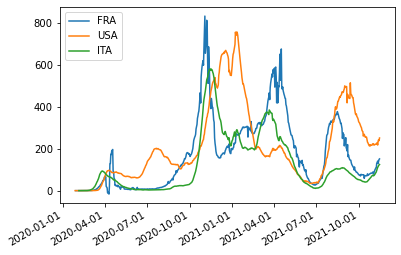

In [15]:
countries = ["FRA", "USA", "ITA"]
for country in countries:
    plt.plot(covid_data.loc[ covid_data["iso_code"] == country, "date" ], 
             covid_data.loc[ covid_data["iso_code"] == country, "new_cases_smoothed_per_million" ],
             label=country)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")

# Pays avec le plus de cas actuellement

In [39]:
covid_data.loc[ (covid_data["date"] == "2021-11-15") & ((covid_data["continent"] == "Europe")), 
                ["date", "location", "new_cases_smoothed_per_million"] ].style.format(
    {"new_cases_smoothed_per_million": "{:.0f}"}
).background_gradient(subset=["new_cases_smoothed_per_million"], cmap="Reds")

In [41]:
covid_data["location"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [25]:
import pandas as pd
import folium
import geopandas

# The URL we will read our data from
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_meat_consumption'
# read_html returns a list of tables from the URL
tables = pd.read_html(url)

# The data is in the first table - this changes from time to time - wikipedia is updated all the time.
table = tables[0]

# Read the geopandas dataset
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Merge the two DataFrames together
table = world.merge(table, how="left", left_on=['name'], right_on=['Country'])

# Clean data: remove rows with no data
table = table.dropna(subset=['kg/person (2002)[9][note 1]'])

# Create a map
my_map = folium.Map()

# Add the data
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['Country', 'kg/person (2002)[9][note 1]'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Meat consumption in kg/person'
).add_to(my_map)
my_map.save('meat.html')


In [82]:
actual_cases = covid_data.loc[ covid_data["date"] == "2021-11-15", ["location", "new_cases_smoothed_per_million"] ]

# Read the geopandas dataset
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Merge the two DataFrames together
table = world.merge(actual_cases, how="inner", left_on=['name'], right_on=['location'])

# Clean data: remove rows with no data
#table = table.dropna(subset=['kg/person (2002)[9][note 1]'])

# Create a map
my_map = folium.Map(location=[48.856614, 2.3522219], zoom_start=5, max_zoom=6, min_zoom=2)

# Add the data
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['location', 'new_cases_smoothed_per_million'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='New cases per million'
).add_to(my_map)
my_map